In [14]:
import histogramSegmentation as hs
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters
from scipy import signal
import importlib

In [16]:
# https://stackoverflow.com/questions/1254370/reimport-a-module-in-python-while-interactive
importlib.reload(hs)

<module 'histogramSegmentation' from 'C:\\app\\dev\\hp\\projects\\ImageProcessing\\2007-TIP-HistogramSegmentation\\code\\python\\histogramSegmentation.py'>

In [6]:
i1 = np.array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,    7,   19,   29,   59,   97,  137,  182,
        221,  299,  422,  499,  614,  758,  944, 1060, 1255, 1441, 1648,
       1760, 1884, 1998, 2090, 2023, 2101], dtype=np.int64)

In [7]:
i2 = np.array([2090, 2023, 2101, 2088, 2030, 1978, 1808, 1730, 1668, 1577, 1469,
       1278, 1236, 1220, 1003,  930], dtype=np.int64)

In [10]:
i2pav = hs.pool_adjacent_violators(i2, False)

In [13]:
h1,h2 = (i2, i2pav)

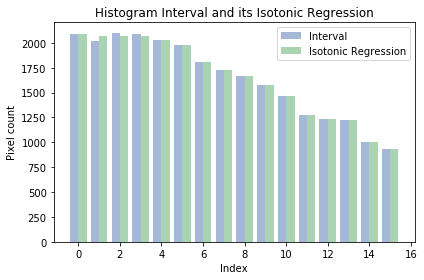

In [17]:
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots()

    x = np.arange(max(h1.size, h2.size))  # the label locations
    width = 0.4  # the width of the bars

    ax.bar(x - width/2, h1, width, label='Interval', alpha=0.5)
    ax.bar(x + width/2, h2, width, label='Isotonic Regression', alpha=0.5)

    ax.set_ylabel('Pixel count')
    ax.set_xlabel('Index')
    ax.set_title('Histogram Interval and its Isotonic Regression')
    ax.legend()
    fig.tight_layout()
    plt.show()


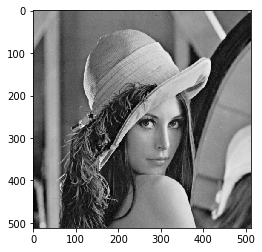

In [2]:
    img = np.array(Image.open('../../images/lena.png').convert('L'))
    plt.imshow(img, cmap='gray', interpolation='none')

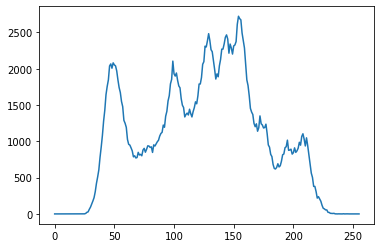

In [4]:
histogram = np.bincount(img.ravel(), minlength=256)
plt.plot(histogram)

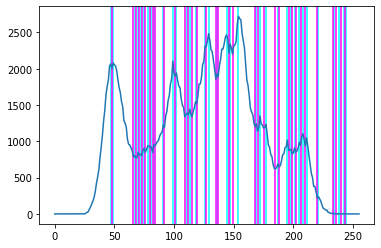

In [5]:
H = histogram
N = histogram.size
idxs_max, _ = signal.find_peaks(histogram)
idxs_min, _ = signal.find_peaks(-histogram)
idxs = np.sort(np.concatenate([np.array([0]), idxs_min, idxs_max, np.array([N-1])]))
for i in range(idxs_max.size):
    plt.axvline(x=idxs_max[i], color='cyan')
for i in range(idxs_min.size):
    plt.axvline(x=idxs_min[i], color='magenta')
plt.plot(histogram)

In [5]:
idxs

array([  0,  47,  48,  49,  66,  67,  68,  70,  71,  72,  73,  75,  76,
        78,  80,  81,  82,  83,  84,  91,  92,  99, 101, 102, 109, 111,
       112, 113, 115, 118, 119, 126, 127, 129, 135, 136, 137, 144, 146,
       147, 149, 154, 168, 169, 170, 172, 175, 177, 185, 187, 188, 195,
       196, 198, 199, 201, 202, 205, 206, 208, 210, 211, 220, 221, 233,
       234, 236, 238, 240, 242, 243, 244, 255], dtype=int64)

In [17]:
    e = 0
    # find if idxs starts with a minimum or a maximum
    begins_with_min = H[idxs[0]] < H[idxs[1]]

    # FILL THE LIST OF ENTROPIES FOR ALL MODES
    # The merging of two contiguous modes [a,b] and [b,c] can be done in two ways,
    # either by using the maximum M1 on [a,b] and by testing the decreasing hypothesis on [M1,c],
    # or by using the maximum M2 on [b,c] and by testing the increasing hypothesis on [a,M2].
    # For each configuration, we compute the entropy of the worst interval against the considered hypothesis.
    K = idxs.size
    maxEntropies = np.zeros((K-3,))
    # Loop on all optimas
    for k in range(0, K-3):
        # decide if we want to test the increasing or decreasing hypothesis on [idxs(k), idxs(k+3)]
        nonDecreasing = 1 if (not begins_with_min and k % 2 == 1) or (begins_with_min and k % 2 == 0) else 0
        # compute the max entropy on the interval [k,k+3]
        maxEntropies[k] = hs.max_entropy(H, idxs[k], idxs[k+3], e, nonDecreasing)

    # MERGING of MODES
    # [idxs(kmin), idxs(kmin+3)] is the first interval to merge
    kmin = np.argmin(maxEntropies)
    valmin = maxEntropies[kmin]


In [18]:
maxEntropies

array([-7.04425830e+00, -5.16371743e+00,  4.69061042e+02, -5.33120356e+00,
       -2.60296846e+00, -1.98452835e+00, -2.60069919e+00, -2.29691162e+00,
       -2.67479315e+00, -1.53653006e+00, -2.81528721e+00, -2.11629073e+00,
       -2.99172294e+00, -2.70331410e+00, -1.53124068e+00, -9.81140357e-01,
       -3.99105867e+00,  7.86730100e+00, -4.86964636e+00,  6.94688871e+01,
       -2.24519608e+00, -4.13402510e+00,  4.14802051e+01, -4.04676872e+00,
       -2.67465649e+00, -2.40281919e+00, -2.77435164e+00,  1.78780505e-01,
       -4.32872390e+00,  4.77232537e+01, -4.18647379e+00, -3.12770436e+00,
        1.98603932e+01, -3.64538190e+00, -3.95726953e+00,  1.75716959e+01,
       -1.33189833e+00, -2.54945718e+00, -3.22158048e+00,  1.29743046e+01,
        4.53162900e+02, -4.95605175e+00, -2.06519161e+00, -4.15594347e-01,
       -1.13447002e+00, -4.44490556e+00,  1.07802875e+02, -3.60336440e+00,
       -3.99393465e+00,  2.04790400e+01, -2.06395553e+00, -2.68144371e+00,
       -2.38667625e+00, -

In [19]:
(kmin, valmin)

(0, -7.044258297551654)